<a href="https://colab.research.google.com/github/PuChan-HCI/myweb/blob/main/MediaSystem/ImageProcessing03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前準備

### URLから画像を入手 (Get an image from a url)
Note: In order to read an image from the github, you need to modify the url.

[Original URL] https://github.com/PuChan-HCI/myweb/blob/main/MediaSystem/woman.jpg (It's not working)

[Modified URL] https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg

In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg'
file_name = 'woman.jpg'
urllib.request.urlretrieve(url, file_name)

('woman.jpg', <http.client.HTTPMessage at 0x7e8781b9d5d0>)

### 画像の表示

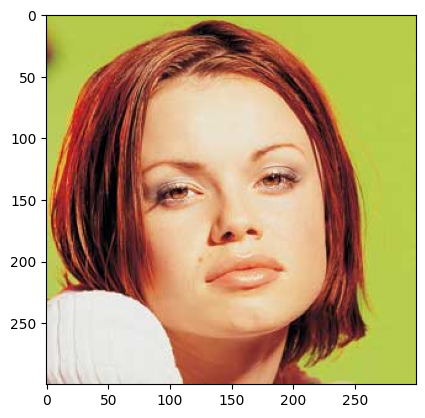

In [2]:
import cv2
from matplotlib import pyplot as plt

orig = cv2.imread('woman.jpg')
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

# 画像幾何学 (Image Geometry)

### 並進（水平）Horizontal Translation

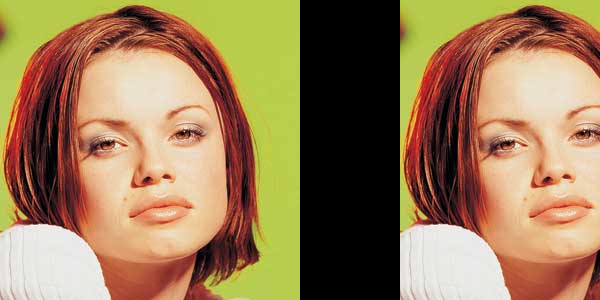

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def shift_x(image, shift):
  h, w = image.shape[:2]
  src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
  dest = src.copy()
  dest[:,0] += shift
  affine = cv2.getAffineTransform(src, dest)
  return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  converted = shift_x(image, 100) # 100画素を正の方向（横）に移動
  combined_image = cv2.hconcat([image, converted])
  cv2_imshow(combined_image)

### 並進（垂直）Vertical Translation

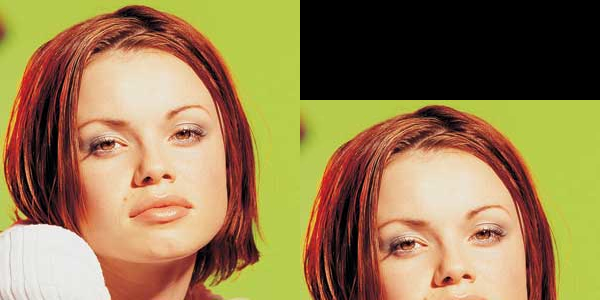

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def shift_x(image, shift):
  h, w = image.shape[:2]
  src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
  dest = src.copy()
  dest[:,1] += shift
  affine = cv2.getAffineTransform(src, dest)
  return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  converted = shift_x(image, 100) # 100画素を正の方向（縦）に移動
  combined_image = cv2.hconcat([image, converted])
  cv2_imshow(combined_image)

### 並進（ランダム）Random Translation

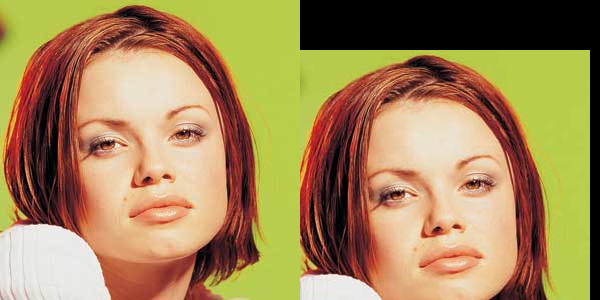

In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def random_shift(image, shifts):
  h, w = image.shape[:2]
  src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
  dest = src + shifts.reshape(1,-1).astype(np.float32)
  affine = cv2.getAffineTransform(src, dest)
  return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  converted = random_shift(image, np.array([-10,50])) # 横（-10）と縦（50）の方向に移動
  combined_image = cv2.hconcat([image, converted])
  cv2_imshow(combined_image)

### 拡大 (Scaling)

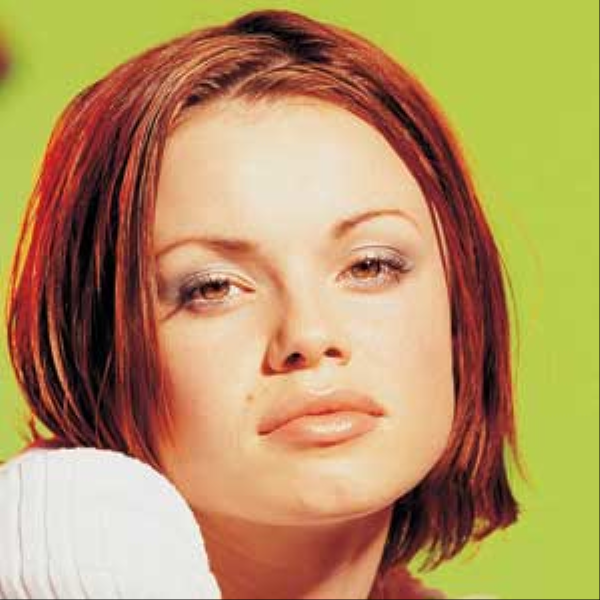

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def expand(image, ratio):
  h, w = image.shape[:2]
  src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
  dest = src * ratio
  affine = cv2.getAffineTransform(src, dest)
  return cv2.warpAffine(image, affine, (2*w, 2*h), cv2.INTER_LANCZOS4)

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  converted = expand(image, 2) # 二倍に拡大
  cv2_imshow(converted)

### せん断（水平）Horizontal Shear (Skew)

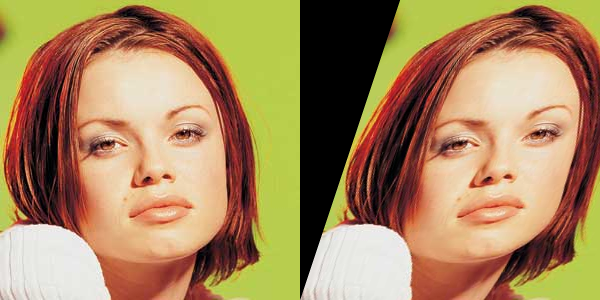

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def shear_x(image, shear):
  h, w = image.shape[:2]
  src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
  dest = src.copy()
  dest[:,0] += (shear / h * (h - src[:,1])).astype(np.float32)
  affine = cv2.getAffineTransform(src, dest)
  return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  converted = shear_x(image, 100)
  combined_image = cv2.hconcat([image, converted])
  cv2_imshow(combined_image)

### せん断（垂直）Vertical Shear (Skew)

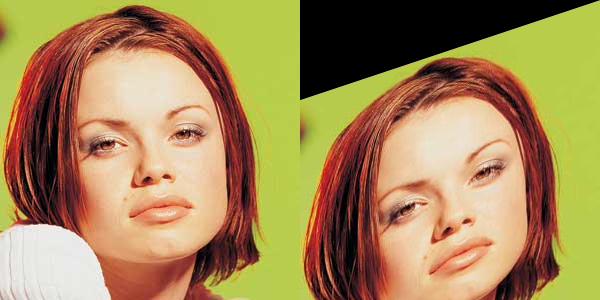

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def shear_y(image, shear):
    h, w = image.shape[:2]
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,1] += (shear / w * (w - src[:,0])).astype(np.float32)
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  converted = shear_y(image, 100)
  combined_image = cv2.hconcat([image, converted])
  cv2_imshow(combined_image)

### 反転 (Reverse)

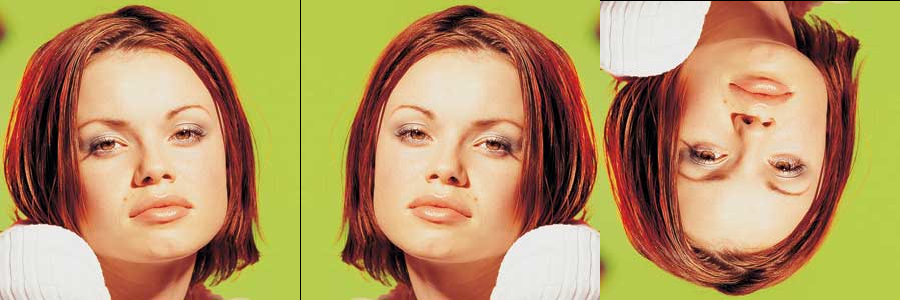

In [13]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def flip(image, direction):
    h, w = image.shape[:2]
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    if(direction):
      dest[:,direction] = h - src[:,direction]
    else:
      dest[:,direction] = w - src[:,direction]
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  horizontal = flip(image, 0)     # '0' 横方向の反転
  vertical = flip(image, 1)       # '1' 縦方向の反転
  combined_image = cv2.hconcat([image, horizontal])
  combined_image = cv2.hconcat([combined_image, vertical])
  cv2_imshow(combined_image)

### 回転（原点が中心）Rotation (Origin as the center)

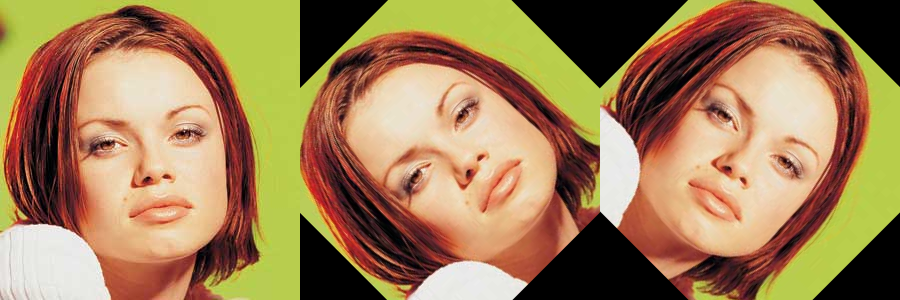

In [14]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def rotate(image, angle):
  h, w = image.shape[:2]
  affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
  return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  rotated = rotate(image, 45)
  combined_image = cv2.hconcat([image, rotated])
  rotated = rotate(image, -45)
  combined_image = cv2.hconcat([combined_image, rotated])
  cv2_imshow(combined_image)

### 回転（はみ出さない）Rotation (Not out of frame)

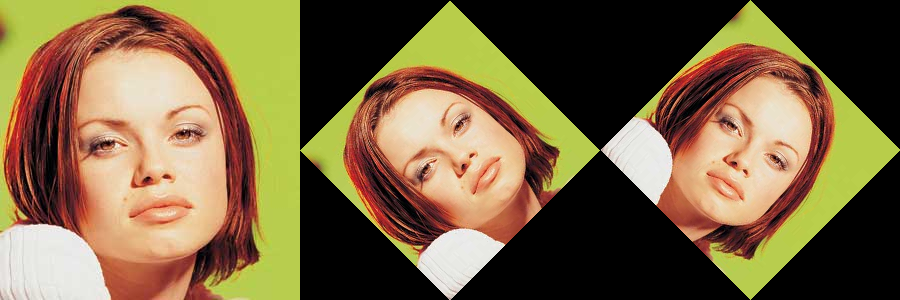

In [16]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def rotate_fit(image, angle):
    h, w = image.shape[:2]
    # 回転後のサイズ
    radian = np.radians(angle)
    sine = np.abs(np.sin(radian))
    cosine = np.abs(np.cos(radian))
    tri_mat = np.array([[cosine, sine],[sine, cosine]], np.float32)
    old_size = np.array([w,h], np.float32)
    new_size = np.ravel(np.dot(tri_mat, old_size.reshape(-1,1)))
    # 回転アフィン
    affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
    # 平行移動
    affine[:2,2] += (new_size-old_size)/2.0
    # リサイズ
    affine[:2,:] *= (old_size / new_size).reshape(-1,1)
    return cv2.warpAffine(image, affine, (w, h))

if __name__ == "__main__":
  image = cv2.imread('woman.jpg')
  rotated = rotate_fit(image, 45)
  combined_image = cv2.hconcat([image, rotated])
  rotated = rotate_fit(image, -45)
  combined_image = cv2.hconcat([combined_image, rotated])
  cv2_imshow(combined_image)

# 特徴抽出 (Feature Extraction)

### 画像の準備 (Read images from URLs)

In [21]:
import urllib.request
url1 = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/book.jpg'
book = 'book.jpg'
urllib.request.urlretrieve(url1, book)
url2 = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/table.jpg'
table = 'table.jpg'
urllib.request.urlretrieve(url2, table)



('table.jpg', <http.client.HTTPMessage at 0x7e873bd32d10>)

### キーポイントを描画 (Keypoints)

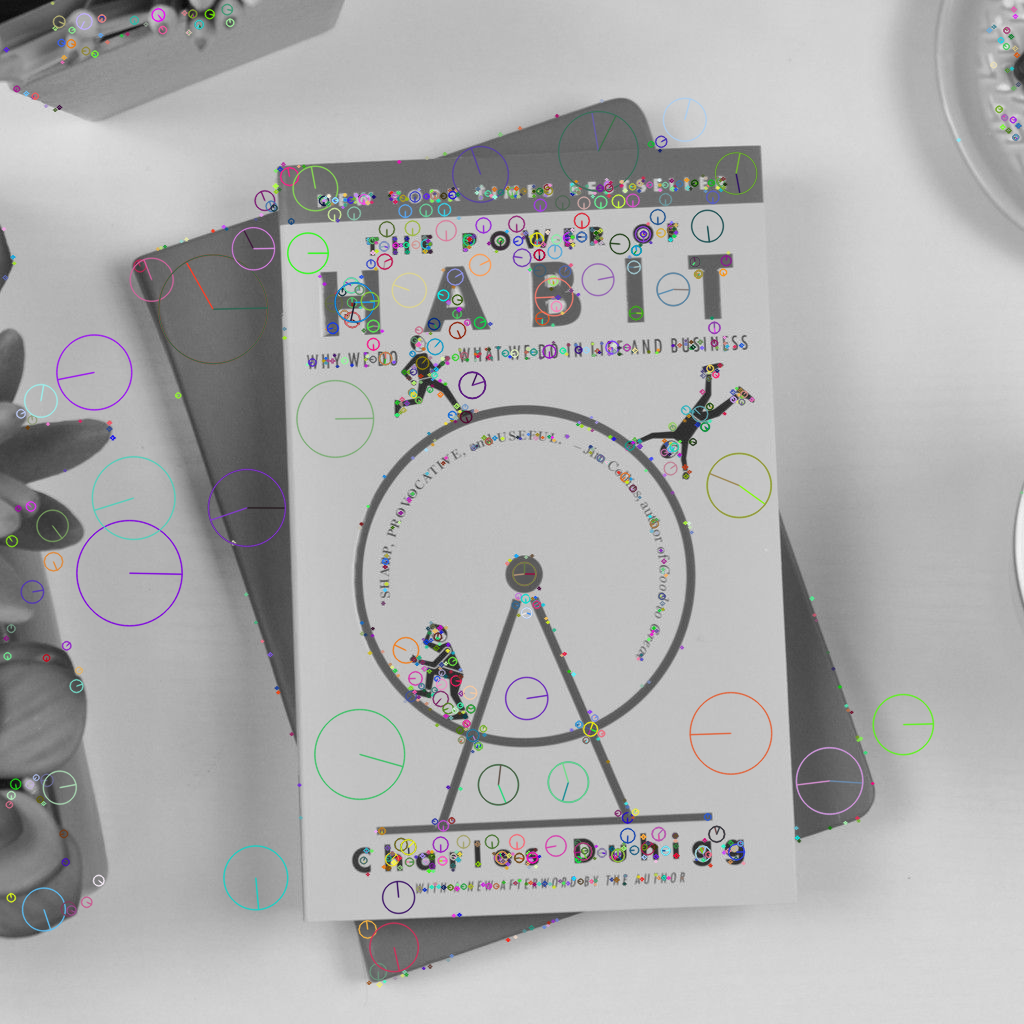

In [22]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

image_book = cv2.imread(book)
image_table = cv2.imread(table)

gray_book = cv2.cvtColor(image_book, cv2.COLOR_BGR2GRAY)
gray_table = cv2.cvtColor(image_table, cv2.COLOR_BGR2GRAY)
# create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()
# detect features from the image
keypoints_table, descriptors_table = sift.detectAndCompute(image_table, None)
# draw the detected key points
sift_gray_table = cv2.drawKeypoints(gray_table, keypoints_table, image_table, flags=4)
# show the image
cv2_imshow(sift_gray_table)


### マッチング (Matching)

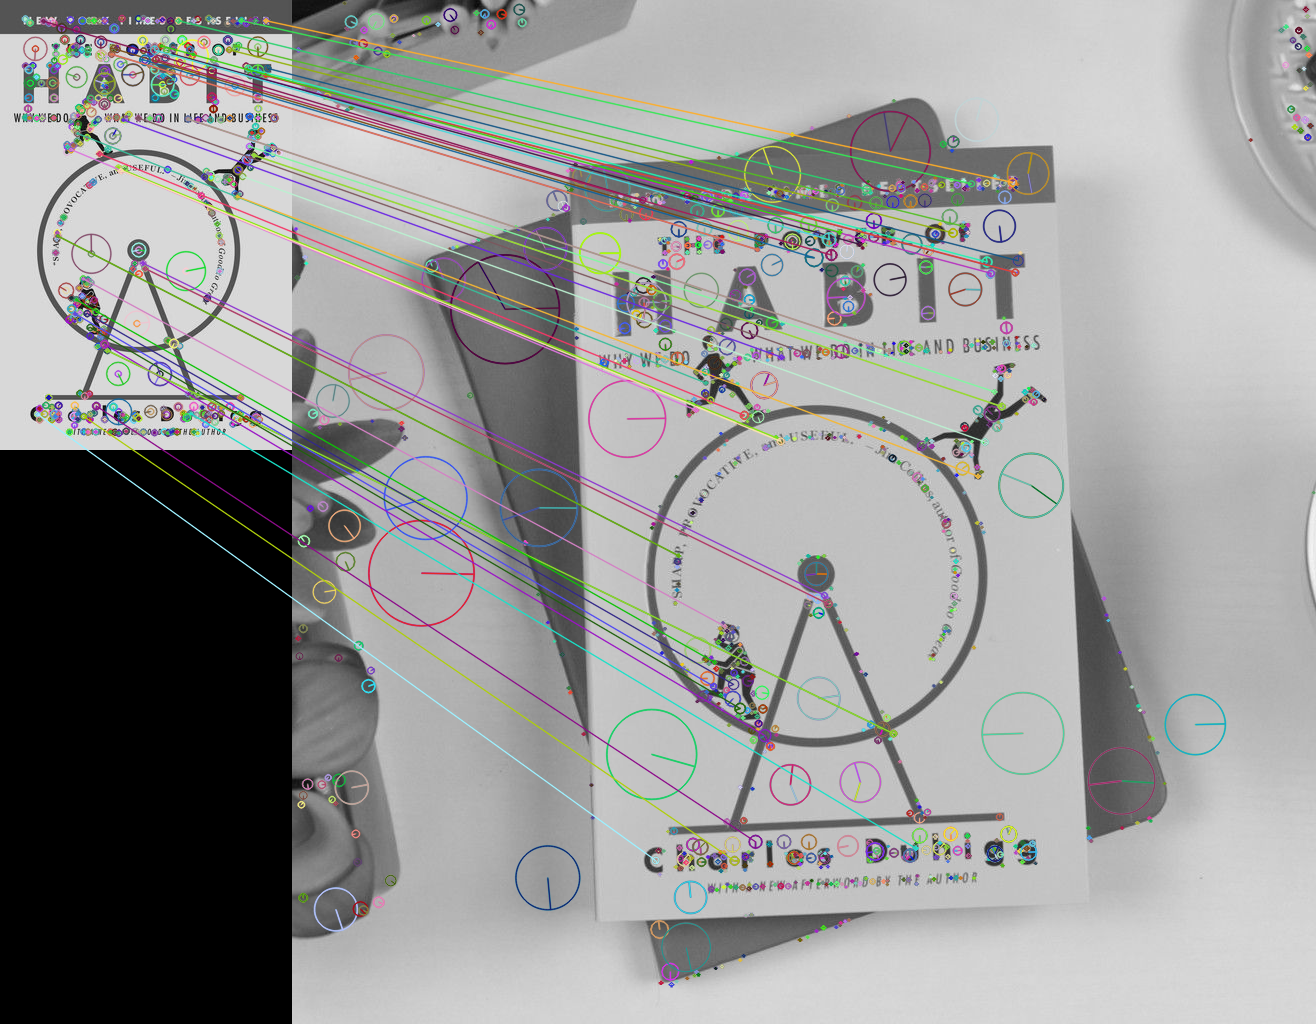

In [23]:
# bookとtableをマッチングさせる
keypoints_book, descriptors_book = sift.detectAndCompute(image_book, None)
sift_gray_book = cv2.drawKeypoints(gray_book, keypoints_book, image_book)

# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_book, descriptors_table)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(image_book, keypoints_book, image_table, keypoints_table, matches[:50], image_table, flags=4)
# show the image
cv2_imshow(matched_img)

# グレーレベルの同時生起行列 (GLCM: Gray-Level Co-Occurrence Matrix)

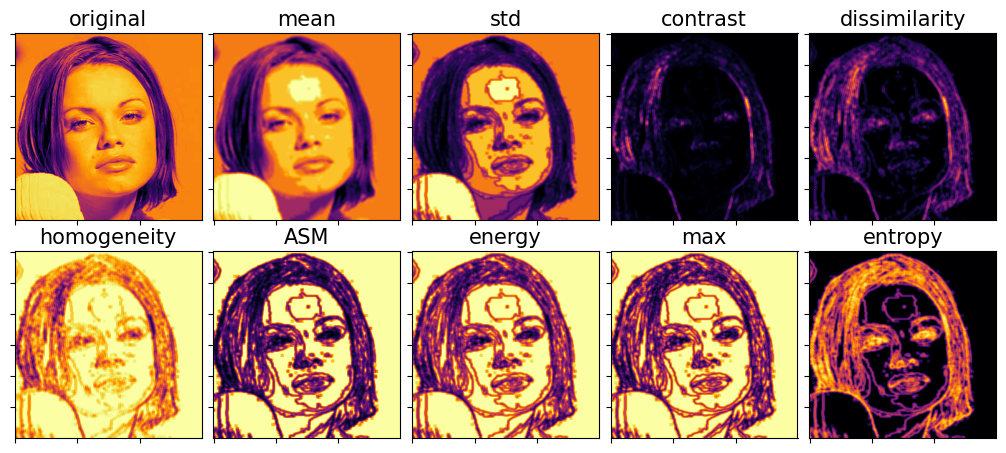

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # for image display

def fast_glcm(img, vmin=0, vmax=255, levels=8, kernel_size=5, distance=1.0, angle=0.0):

  mi, ma = vmin, vmax
  ks = kernel_size
  h,w = img.shape

  # digitize
  bins = np.linspace(mi, ma+1, levels+1)
  gl1 = np.digitize(img, bins) - 1

  # make shifted image
  dx = distance*np.cos(np.deg2rad(angle))
  dy = distance*np.sin(np.deg2rad(-angle))
  mat = np.array([[1.0,0.0,-dx], [0.0,1.0,-dy]], dtype=np.float32)
  gl2 = cv2.warpAffine(gl1, mat, (w,h), flags=cv2.INTER_NEAREST,
                       borderMode=cv2.BORDER_REPLICATE)

  # make glcm
  glcm = np.zeros((levels, levels, h, w), dtype=np.uint8)
  for i in range(levels):
    for j in range(levels):
      mask = ((gl1==i) & (gl2==j))
      glcm[i,j, mask] = 1

  kernel = np.ones((ks, ks), dtype=np.uint8)
  for i in range(levels):
    for j in range(levels):
      glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

  glcm = glcm.astype(np.float32)
  return glcm


def fast_glcm_mean(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  h,w = img.shape
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  mean = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      mean += glcm[i,j] * i / (levels)**2
  return mean

def fast_glcm_std(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  h,w = img.shape
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  mean = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      mean += glcm[i,j] * i / (levels)**2

  std2 = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      std2 += (glcm[i,j] * i - mean)**2

  std = np.sqrt(std2)
  return std

def fast_glcm_contrast(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  h,w = img.shape
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  cont = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      cont += glcm[i,j] * (i-j)**2

  return cont

def fast_glcm_dissimilarity(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  h,w = img.shape
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  diss = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      diss += glcm[i,j] * np.abs(i-j)

  return diss

def fast_glcm_homogeneity(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  h,w = img.shape
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  homo = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      homo += glcm[i,j] / (1.+(i-j)**2)

  return homo

def fast_glcm_ASM(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  h,w = img.shape
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  asm = np.zeros((h,w), dtype=np.float32)
  for i in range(levels):
    for j in range(levels):
      asm  += glcm[i,j]**2

  ene = np.sqrt(asm)
  return asm, ene

def fast_glcm_max(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  max_  = np.max(glcm, axis=(0,1))
  return max_


def fast_glcm_entropy(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
  glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
  pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
  ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
  return ent

if __name__ == '__main__':
  levels = 8
  ks = 5
  mi, ma = 0, 255

  orig = cv2.imread('woman.jpg')
  img = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
  h,w = img.shape

  # img[:,:w//2] = img[:,:w//2]//2+127
  mean = fast_glcm_mean(img)
  std = fast_glcm_std(img)
  cont = fast_glcm_contrast(img)
  diss = fast_glcm_dissimilarity(img)
  homo = fast_glcm_homogeneity(img)
  asm, ene = fast_glcm_ASM(img)
  ma = fast_glcm_max(img)
  ent = fast_glcm_entropy(img)

  plt.figure(figsize=(10,4.5))
  plt.rcParams['image.cmap'] = 'inferno'
  fs = 15
  plt.subplot(2,5,1)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(img)
  plt.title('original', fontsize=fs)

  plt.subplot(2,5,2)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(mean)
  plt.title('mean', fontsize=fs)

  plt.subplot(2,5,3)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(std)
  plt.title('std', fontsize=fs)

  plt.subplot(2,5,4)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(cont)
  plt.title('contrast', fontsize=fs)

  plt.subplot(2,5,5)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(diss)
  plt.title('dissimilarity', fontsize=fs)

  plt.subplot(2,5,6)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(homo)
  plt.title('homogeneity', fontsize=fs)

  plt.subplot(2,5,7)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(asm)
  plt.title('ASM', fontsize=fs)

  plt.subplot(2,5,8)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(ene)
  plt.title('energy', fontsize=fs)

  plt.subplot(2,5,9)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(ma)
  plt.title('max', fontsize=fs)

  plt.subplot(2,5,10)
  plt.tick_params(labelbottom=False, labelleft=False)
  plt.imshow(ent)
  plt.title('entropy', fontsize=fs)

  plt.tight_layout(pad=0.5)
  plt.show()

